## Polynomial Regression

Disclaimer: 
<br> This solution is showcased to share my understanding of the problem and my own approach to it.
<br> This solution is not intended for any general application.

#### For questions, suggestions and further details, please feel free to contact me at juan-carlos.ramirez@warwick.ac.uk

---------

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
sns.set_theme() # Seaborn template
plt.rcParams['figure.figsize'] = [16, 8] # Default to bigger plots

------------

## Motivation

Our motivation in the present notebook will be to use polynomial regression to explore the behavior of the model under variations of its complexity and the training data amount.

-----------

## Data Exploration

First, by making use of the "regression_data.xlsx" file, we plot our data to get a better grasp of it. In this assignment, we are given the true function that generates the Y values in the regression_data.xlsx file, this function is

$$ f^{*}(x) = (x-2) (x-1) x (x+1) (x+2) $$

Using this function, we can calculate the true values given our X values, which we will add to our Data table.
This true values are just our Y values without the noise added to it, which is known to be distributed $N(0,1)$.

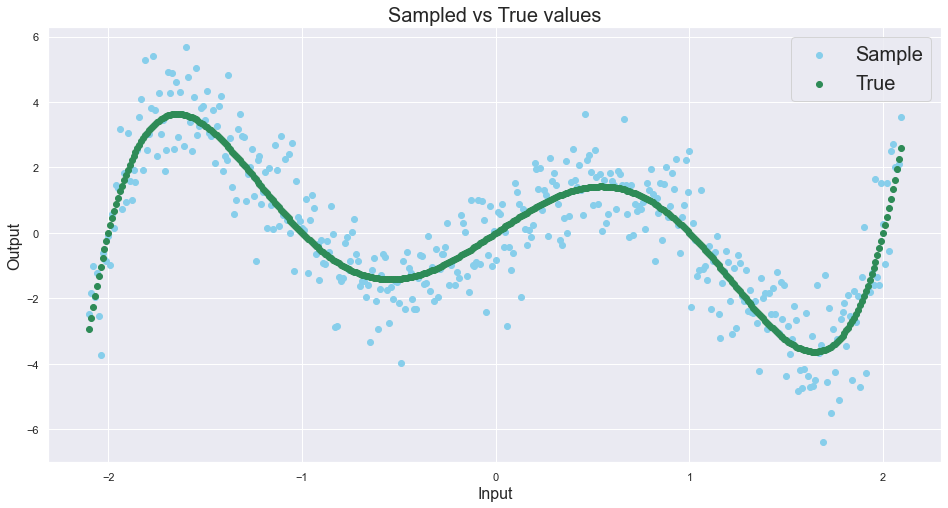

In [2]:
# Read the Data
Data = pd.read_excel("6.1 Polynomial regression data.xlsx")
# Calculate true values
Data.insert(2,'true',Data.x.apply(lambda x: (x-2)*(x-1)*x*(x+1)*(x+2)))
# Plot values
plt.title('Sampled vs True values', fontsize=20)
plt.scatter(Data.x,Data.y,label='Sample',color='skyblue')
plt.scatter(Data.x,Data.true,label='True',color='seagreen')
plt.legend(loc='upper right', fontsize=20)
plt.xlabel('Input', fontsize=16)
plt.ylabel('Output', fontsize=16)
plt.winter()
plt.show()

Here we can confirm that our Y values are indeed just noisy values of our true function.

------------

## Optimal Risk Estimation

Next, we turn our attention to Risk Estimation, in this particular case, we have the advantage of knowing the true function that generates our data, we will make use of this knowledge as an accurate benchmark for our Optimal Risk Estimation.

Recall that, we can estimate our Risk with 

$$ \hat{R}(f) = \frac{1}{n} \sum_{i=1}^{n}{L(Y_{i},f(X_{i}))} $$

Here, we choose our Loss function to be the Squared Error Loss function, therefore we have

$$ \hat{R}(f) = \frac{1}{n} \sum_{i=1}^{n}{(Y_{i}-f(X_{i}))^{2}} $$

In [3]:
# Create function to calculate Empirical Risk with the Squared Error Loss function
# Same as skmetrics.mean_squared_error(sample, prediction)
def Empirical_Risk_SE(sample, prediction):
    return np.mean((sample - prediction)**2)
print("The Empirical Risk under Squared Error Loss is:",str(round(Empirical_Risk_SE(Data.y, Data.true),4)))
# Delete True data (After this point, we do not know the true model anymore)
Data.drop('true',axis=1,inplace=True)

The Empirical Risk under Squared Error Loss is: 1.0261


-------------

## Investigating Model Complexity

Our new goal is to investigate how will our Polynomial model prediction error behave exposed to different levels of model complexity (in this case, model complexity means number of basis functions to use)

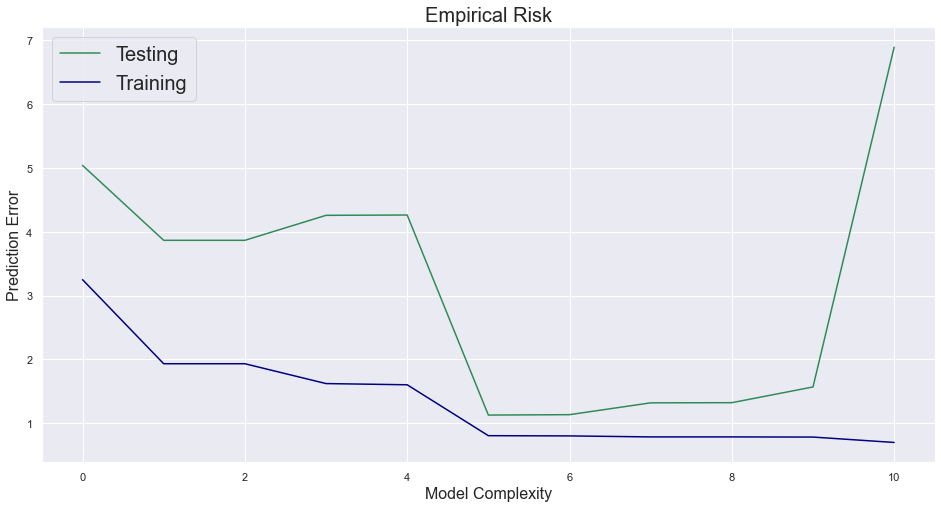

In [4]:
# Select training and testing samples (fixed in this section)
X_test, Y_test = Data.iloc[30:,0].values.reshape(-1, 1), Data.iloc[30:,1].values.reshape(-1, 1)
X_train, Y_train = Data.iloc[:30,0].values.reshape(-1, 1), Data.iloc[:30,1].values.reshape(-1, 1)

Testing_Risk = []
Training_Risk = []
Prediction_Dict = {}
for o in range(11):
    # Build the model under different degrees of Polynomial features
    Model = make_pipeline(PolynomialFeatures(o), LinearRegression())
    # Fit our model
    Model.fit(X_train, Y_train)
    # Predict with our model (both on training and testing) 
    Prediction_Dict[o] = Model.predict(X_test)
    Y_pred_train = Model.predict(X_train)
    # Calculate the Testing and Training Risk
    Testing_Risk.append(Empirical_Risk_SE(Y_test, Prediction_Dict[o]))
    Training_Risk.append(Empirical_Risk_SE(Y_train, Y_pred_train))
    
# Plot values
plt.title('Empirical Risk', fontsize=20)
plt.plot(range(11),Testing_Risk,label='Testing',color='seagreen')
plt.plot(range(11),Training_Risk,label='Training',color='navy')
plt.legend(loc='upper left', fontsize=20)
plt.xlabel('Model Complexity', fontsize=16)
plt.ylabel('Prediction Error', fontsize=16)
plt.winter()
plt.show()

Based on our results displayed in the previous figure, we are going to use a degree of 5 for our Polynomial Regression from now on, since we see that with that order, we minimize our Testing error and keep a relatively low Training error.

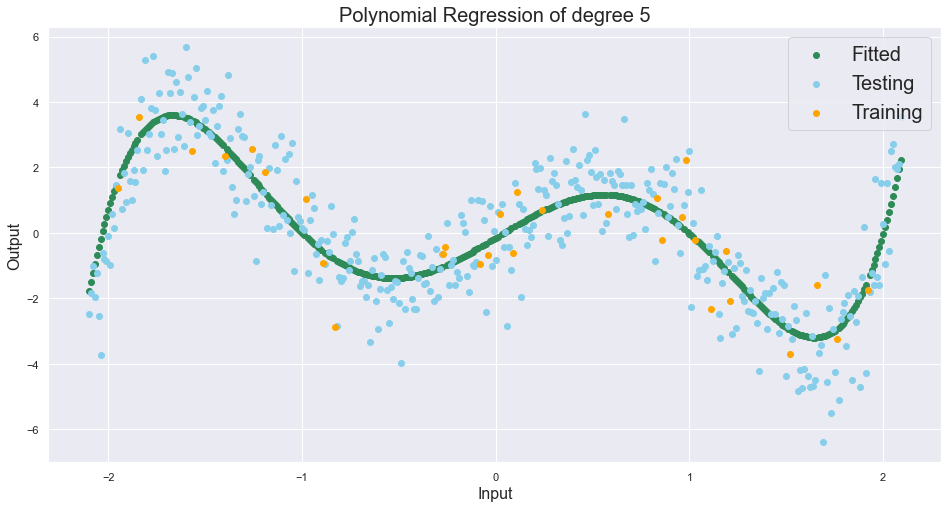

In [5]:
# Plot values
plt.title('Polynomial Regression of degree 5', fontsize=20)
plt.scatter(X_test,Prediction_Dict[5],label='Fitted',color='seagreen')
plt.scatter(X_test,Y_test,label='Testing',color='skyblue')
plt.scatter(X_train,Y_train,label='Training',color='orange')
plt.legend(loc='upper right', fontsize=20)
plt.xlabel('Input', fontsize=16)
plt.ylabel('Output', fontsize=16)
plt.winter()
plt.show()

-------------

## Investigating Training Size Sensibility

Finally, we turn our atention to the behaviour of our chosen model to changes in training set size

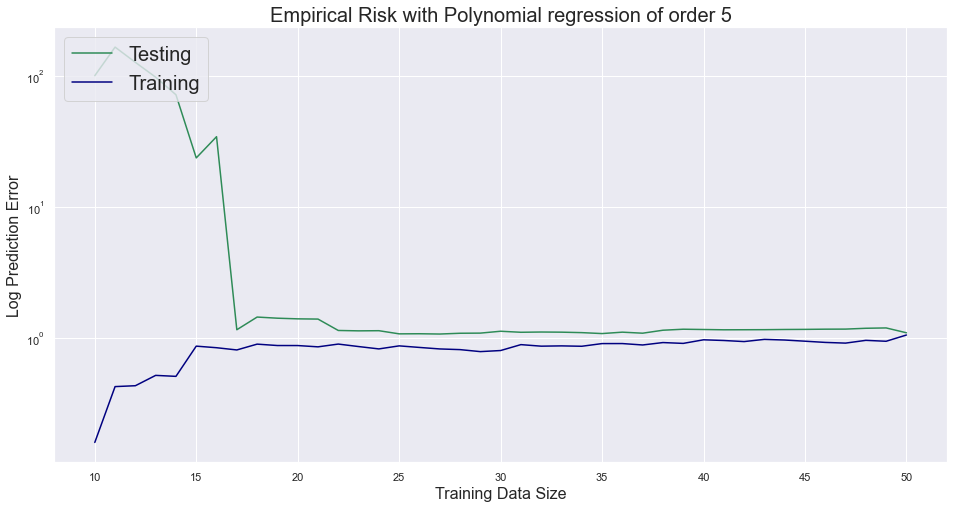

In [6]:
Order = 5
Testing_Risk = []
Training_Risk = []
for s in range(10,51):
    # Select training and testing samples (fixed in this section)
    X_test, Y_test = Data.iloc[s:,0].values.reshape(-1, 1), Data.iloc[s:,1].values.reshape(-1, 1)
    X_train, Y_train = Data.iloc[:s,0].values.reshape(-1, 1), Data.iloc[:s,1].values.reshape(-1, 1)
    # Build the model under different degrees of Polynomial features (Chosen model order)
    Model = make_pipeline(PolynomialFeatures(Order), LinearRegression())
    # Fit our model
    Model.fit(X_train, Y_train)
    # Predict with our model (both on training and testing) 
    Y_pred_test = Model.predict(X_test)
    Y_pred_train = Model.predict(X_train)
    # Calculate the Testing and Training Risk
    Testing_Risk.append(Empirical_Risk_SE(Y_test, Y_pred_test))
    Training_Risk.append(Empirical_Risk_SE(Y_train, Y_pred_train))
    
# Plot values
plt.title('Empirical Risk with Polynomial regression of order ' + str(Order), fontsize=20)
plt.semilogy(range(10,51), Testing_Risk, label='Testing',color='seagreen')
plt.semilogy(range(10,51), Training_Risk, label='Training',color='navy')
plt.legend(loc='upper left', fontsize=20)
plt.xlabel('Training Data Size', fontsize=16)
plt.ylabel('Log Prediction Error', fontsize=16)
plt.winter()
plt.show()

-----------

## References
[1]: Scikit-Learn, Polynomial Features, https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html, (accesed: 02/06/2022)
<br>[2]: Scikit-Learn, Linear Regression, https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html, (accesed: 02/06/2022)
<br>[3]: Scikit-Learn, Make Pipeline, https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html (accesed: 02/06/2022)